In [6]:
from pylab import *
%matplotlib inline

import data
import numpy as np


/home/alex/anaconda3/lib/python3.6/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [7]:
patient_ids = data.luna16_get_patient_ids()
pid = patient_ids[0]
image = data.luna16_get_image(pid)

In [8]:
image.shape 

(231, 360, 360)

In [4]:
import pyflann

In [9]:
patches = []
borders = []

def get_border(p, w):
    border = np.concatenate((p[:w,:].ravel(), p[-w:,:].ravel(), p[w:-w,:w].ravel(), p[w:-w,-w:].ravel()))
    #border = np.concatenate((p[:w,:].ravel(), p[w:,:w].ravel()))
    return border

for i in range(0,360-16,2):
    for j in range(0,360-16,2):
        p = image[115,i:i+16,j:j+16]
        #print(p.shape)
        border = get_border(p, 4)
        #print(border.shape)
        patches.append(p)
        borders.append(border)

In [10]:
borders = np.asarray(borders, dtype=np.float32)

In [11]:
fidx = pyflann.FLANN()

In [12]:
fidx.build_index(borders)

{'algorithm': 'kdtree',
 'branching': 32,
 'build_weight': 0.009999999776482582,
 'cb_index': 0.5,
 'centers_init': 'random',
 'checks': 32,
 'cores': 0,
 'eps': 0.0,
 'iterations': 5,
 'key_size_': 20,
 'leaf_max_size': 4,
 'log_level': 'warning',
 'max_neighbors': -1,
 'memory_weight': 0.0,
 'multi_probe_level_': 2,
 'random_seed': 386368897,
 'sample_fraction': 0.10000000149011612,
 'sorted': 1,
 'speedup': 0.0,
 'table_number_': 12,
 'target_precision': 0.8999999761581421,
 'trees': 1}

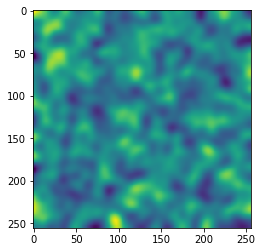

In [13]:
import scipy.ndimage.filters
noise_image = np.random.normal(size=(256,256))*300 - 800
noise_image = scipy.ndimage.filters.gaussian_filter(noise_image, sigma=6)
imshow(noise_image)

In [14]:
import random

In [26]:
output_image = image[130].copy() # np.zeros((256,256))

for i in range(0,output_image.shape[0]-16,12):
    for j in range(0,output_image.shape[1]-16,12):
        p = output_image[i:i+16,j:j+16]
        #p = output_image[i:i+16,j:j+16]
        indices, distances = fidx.nn_index(get_border(p, 4)[None,:].astype(np.float32), 2)
        output_image[i:i+16,j:j+16] = patches[random.choice(indices[0])]

In [31]:
indices

array([[13312, 13140, 13313, 13264]])

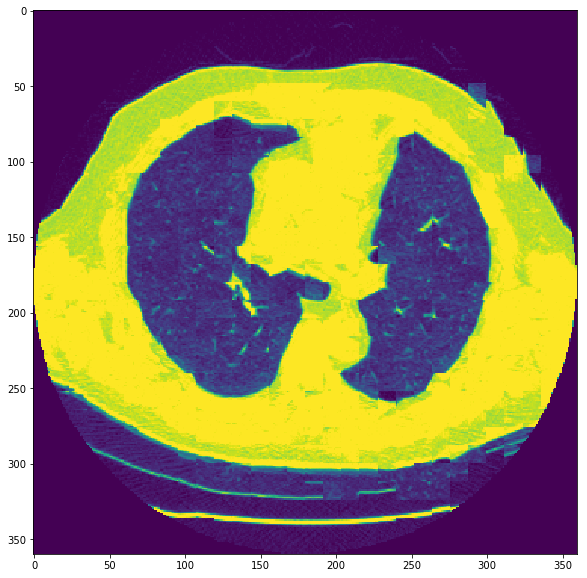

In [27]:
figure(figsize=(10,10))
imshow(output_image, vmin=-1000, vmax=0)

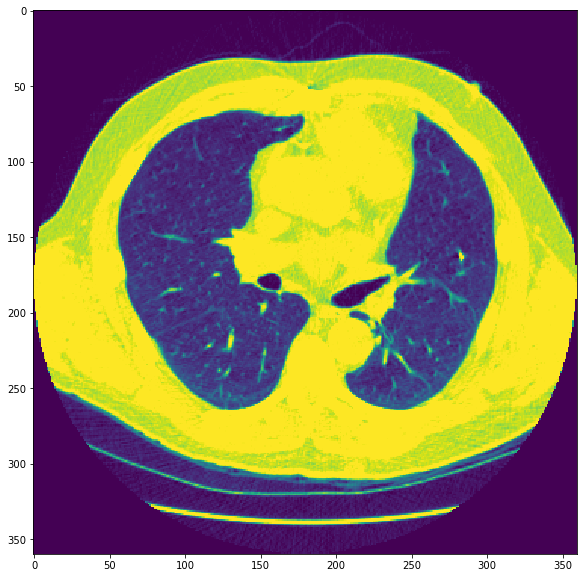

In [70]:
figure(figsize=(10,10))
imshow(image[110], vmin=-1000, vmax=0)